# Exploring the Titanic Dataset

### Introduction

In this project, we will explain the factors that are related with the passanger's survival of the Titanic. 

The question that will guide the following report is: what factors are more related to the chances of surviving in the Titanic. In particular, we will study 4 variables:
1. Sex
2. Age
3. Passanger Class (`Pclass`)
4. Fare

Our analysis is divided in the following parts: First, we will present descriptive statistics of the selected variables. In the second part, we will present the same statistics separated by survival/non survival groups. In this part, we will accompany our findings with corresponding plots to clearly grasp the differences. In the last part of the analysis section, we will use classification methods, as logit regressions, to determine what factors where more important when determining survival chances in the Titanic. We will end up with our conclusions.

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from scipy.stats import ttest_ind

### Reading data

In [667]:
#Reading the data
pd.set_option('precision',3)
titanic_data = pd.read_csv("titanic_data.csv")

In [668]:
#Keeping variables we are interested in
titanic_sel_var = titanic_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=False)

In [669]:
#General description of the data
titanic_sel_var.describe()

,Survived,Pclass,Age,Fare
count,891.000,891.000,714.000,891.000
mean,0.384,2.309,29.699,32.204
std,0.487,0.836,14.526,49.693
min,0.000,1.000,0.420,0.000
25%,0.000,2.000,NaN,7.910
50%,0.000,3.000,NaN,14.454
75%,1.000,3.000,NaN,31.000
max,1.000,3.000,80.000,512.329


### Data description

As it is possible to see, our final data set with the variables we selected, has a total of 891 observations. However, it is important to check that there are some missing data for the age variable. In total, we have 177 observations without date reported. (Note also, that pandas appear to have a problem computing the percentiles when there are NaNs).

From this table, we can extract some interesting data. For example, the mean of the variable `Survived` gives us the percentage of people that survived the tragedy. This can be interpreted as a percentage, because this variable only takes values 1 and 0. Note that, 38.4% of the passengers that appear in this data set survived the accident. We clearly do not want to extend our findings to all the passengers of the Titanic because we do not count with data of the universe of passagers and we do not know if what we have if a representative sample of such population. 

When we inspect the variable `Pclass` (passanger class), we find no mayor surprise. The majority of tickets appear to be of third class (see 50% percentile and the mean). 

Interestingly, the age mean shows a relatively young population (approx. 30 years) with the maximum being 80 years.

The `Fare` variable shows a great range. From no fare at all to 512. Not surprisingly, the standard deviation of this variable is 49.693.


In [670]:
#Creating categorical variables for Sex  and Survived and dropping NAs from age
titanic_sel_var["sex_cat"] = titanic_sel_var["Sex"].astype('category')
titanic_sel_var["surv_cat"] = titanic_sel_var["Survived"].astype('category')
titanic_sel_var["surv_cat"] = titanic_sel_var["surv_cat"].cat.rename_categories(["Died", "Survived"])

In [671]:
print "Description Age\n"
non_nan_age = titanic_sel_var["Age"].dropna()
print non_nan_age.describe()
print "\nDescription Sex \n"
print titanic_sel_var["sex_cat"].describe()

Description Age

count    714.000
mean      29.699
std       14.526
min        0.420
25%       20.125
50%       28.000
75%       38.000
max       80.000
Name: Age, dtype: float64

Description Sex 

count      891
unique       2
top       male
freq       577
Name: sex_cat, dtype: object


We can look more closer at two variables. Once again, we present the variable `Age`, however, this time we have drop all the missing values so `pandas` could give us information about the percentiles. From the results obtained is interesting to observe that 50% of the passengers we have in our data are between 20 and 38 years old (see 25 and 75 percentiles).

We also provide data for the `Sex` variable. Notice that it was initially excluded from our description results becuase it was read as a `string`. We needed, therefore, to change its type to a categorical variable. Note that in our data we have 577 males and 314 female passengers.

In what follows, we present plots for the selected variables. First, we will plot the categorical variables (`Survived` and `Sex`). Then, we will present histograms for the other data. 

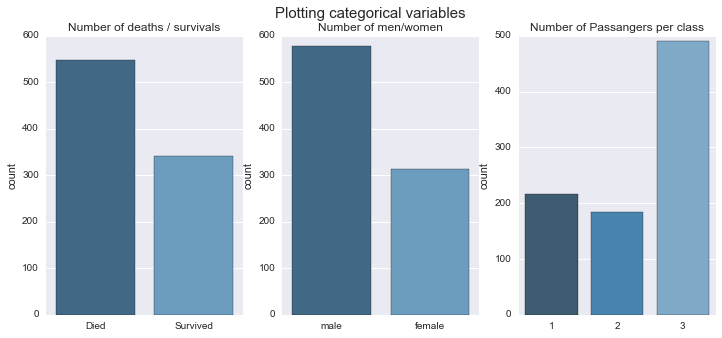

In [672]:
%matplotlib inline
#Creating the canvas
fig, ax = plt.subplots(1, 3, figsize=(12,5))
#Plotting and adding labels
sns.countplot(x="surv_cat", data=titanic_sel_var, ax=ax[0], palette="Blues_d", order=["Died", "Survived"])
ax[0].set_xlabel("")
ax[0].set_title("Number of deaths / survivals")
sns.countplot(x="sex_cat", data=titanic_sel_var, ax=ax[1], palette="Blues_d", order=["male", "female"])
ax[1].set_xlabel("")
ax[1].set_title("Number of men/women")
sns.countplot(x="Pclass", data=titanic_sel_var, palette="Blues_d", ax=ax[2] )
ax[2].set_xlabel("")
ax[2].set_title("Number of Passangers per class")
fig.suptitle("Plotting categorical variables\n\n", fontsize=15)


Plotting the data for the categorical variables gives us a clear impresion of the frequency taken by each of the values. For our dependent variable, that is if a person survived or died in the titanic, it is clear that in our data set we have that more people died. According to the plot, the registries in our dataset show that more than 500 people died in the accident.

The plot also shows that for the sex of the passengers, the majority in the data is male. From the plot we can see that the number of males almost doubles that of the female passengers. 

In terms of the frequency of the number of passengers per classes, unsurprisingly we find that most of them belong to the third class. As we said before, this class groups more than half of the total passengers in the dataset. It is interesting to notice, at least for this dataset, that the category with the least passengers is the second and not the first. This result was different to what we expected to have; namely that there were less passengers in first class.

Now, we plot the histograms for the non-categorical data.

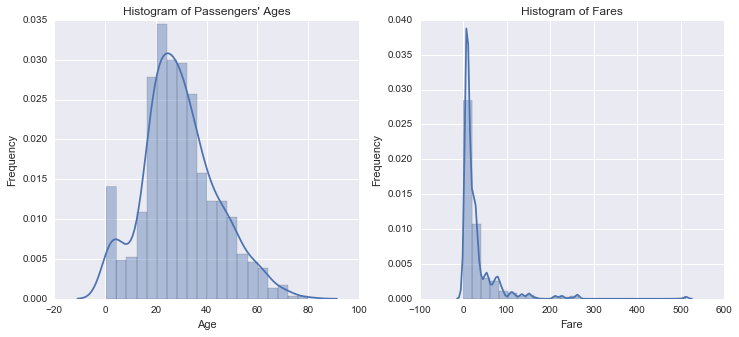

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(non_nan_age, ax=ax[0])
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of Passengers' Ages")
sns.distplot(titanic_sel_var["Fare"], ax=ax[1], bins=25)
ax[1].set_ylabel("Frequency")
ax[1].set_title("Histogram of Fares")

Above, we present the histograms for `age` and `fares`. The variable `Age` appears to be roughly normal. Note, however, that there appears to be a relevant number of children under two years (a total of 14). As we already noted previously, most of the passengers in the data set are within 20 and 40 years old.

The histogram for the fares paid presents a surprisingly spread distribution. On the one hand, it is not surprising that we observe relatively little and quite spread high values. Presumably, those high values correspond to passengers in the first class. It is also interesting to notice that there is a lot of spread in the lower values of the distribution. Apparently, there was a seemingly complex system (or lack of it) to price tickets in the titanic.

## Survived vs. Dead

The dependent variable of this study is whether the passenger in the dataset survived or not the accident. As such, we have selected some independent variables which we consider play a role when determining which passengers would survive or die. In this section we present descriptive statistics for each of our independent variables, grouping by wether this person survive or died in the Titanic. 

### Survival and age

Children and women are normally given priority in case of an accident. Here, we want to check if this was also the case for the Titanic. 

We proceed in the following way. First, we present descriptive statistics per each of the groups. To check for differences, we will also plot the distribution of ages per survival condition. 

Lastly, to be more precise with our findings, we will groups the age data in 5 years bins, and see how survival or death condition varies within those bins.

In [356]:
#Dropping NA's of original data set to perform grouping according to age
titanic_no_na = titanic_sel_var.dropna()

In [358]:
#Creating distributions of ages and box plots for both groups
grouped_by_surv_condition = titanic_no_na.groupby("Survived")["Age"]
table_non_survived = titanic_no_na.groupby("Survived")["Age"].describe()[0]
table_survived = titanic_no_na.groupby("Survived")["Age"].describe()[1]
print "Dead\n"
print table_non_survived
print "\nSurvived\n"
print table_survived

Dead

count    424.000
mean      30.626
std       14.172
min        1.000
25%       21.000
50%       28.000
75%       39.000
max       74.000
Name: Age, dtype: float64

Survived

count    290.000
mean      28.344
std       14.951
min        0.420
25%       19.000
50%       28.000
75%       36.000
max       80.000
Name: Age, dtype: float64


Our expectation that the survival mean will be smaller than the mean for the people who died seems corroborated by this data. However, we still do not know if that difference is statistically significant. Therefore, we performed the following hypothesis test.

$$\mu_{death} = \mu_{survived}$$
$$\mu_{death} \neq \mu_{survived}$$

To perform the test, we use the two side t-test for independent random samples, already implemented in the [scipy stats library](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [367]:
ttest_ind(grouped_by_surv_condition.get_group(0), grouped_by_surv_condition.get_group(1))

Ttest_indResult(statistic=2.0666869462538102, pvalue=0.039124654013482488)

Given the p-value after perfoming the test, we can reject at 5% of significance level that these means correspond to the same population. 

To check for more differences, we provide two plots in what follows: a) the distribution of ages per survival condition, b) a boxplot per survival condition.

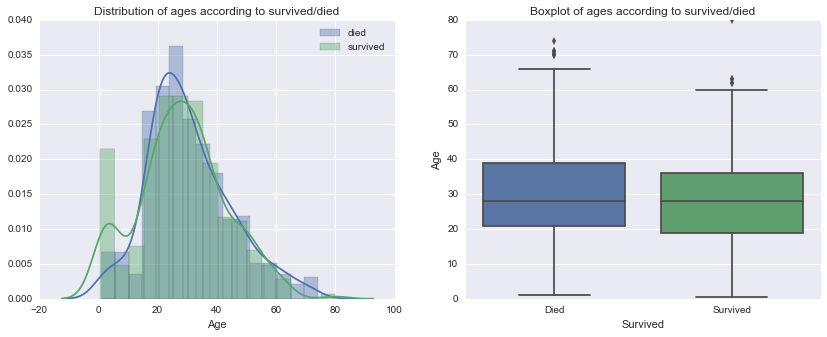

In [368]:
#Creating plots for checking difference in distributions of ages per survival/non survival
fig, axes = plt.subplots(1,2, figsize=(14,5))
non_survived_age_group = titanic_no_na.groupby("Survived")["Age"].get_group(0)
survived_age_group = titanic_no_na.groupby("Survived")["Age"].get_group(1)
sns.distplot(non_survived_age_group, ax=axes[0], label="died")
sns.distplot(survived_age_group, ax=axes[0], label="survived")
axes[0].set_title("Distribution of ages according to survived/died")
axes[0].legend()
sns.boxplot(x=titanic_no_na["Age"], groupby=titanic_no_na["surv_cat"], ax=axes[1])
axes[1].set_title("Boxplot of ages according to survived/died")
axes[1].set_xlabel("Survived")

Plotting the histogram and boxplot of these variables let us see the relationships closer. One of the most striking differences is observed to the left of the histogram. Note how high the survival bar is for children that are approximately between 0 and 5 years. This goes according to what we expected: children where given priority when determining who will survive. Other than that major difference, the shape of both distribution do not seem that different. Both seem fairly normal.

To check how relevant are these differences per age group, in what follows we bin age in 5 year bins. We proceed by plotting the counts and percentages of survived/died passenger within each of the age bins.

In [448]:
#Creating appropriate count variables for died / survived
binned_aged = pd.cut(non_nan_age, bins=np.arange(0, 85, 5))
surv_non_surv_by_group_age = titanic_no_na.groupby(binned_aged)[ "Survived"].agg({"total_surv": "sum", "count": "count"}) 
surv_non_surv_by_group_age["non_survival"] = surv_non_surv_by_group_age["count"] - surv_non_surv_by_group_age["total_surv"]
#Creating within group percentages
surv_non_surv_by_group_age["perc_survive"] = surv_non_surv_by_group_age["total_surv"] / surv_non_surv_by_group_age["count"] 
surv_non_surv_by_group_age["perc_non_survive"] = 1 - surv_non_surv_by_group_age["perc_survive"] 

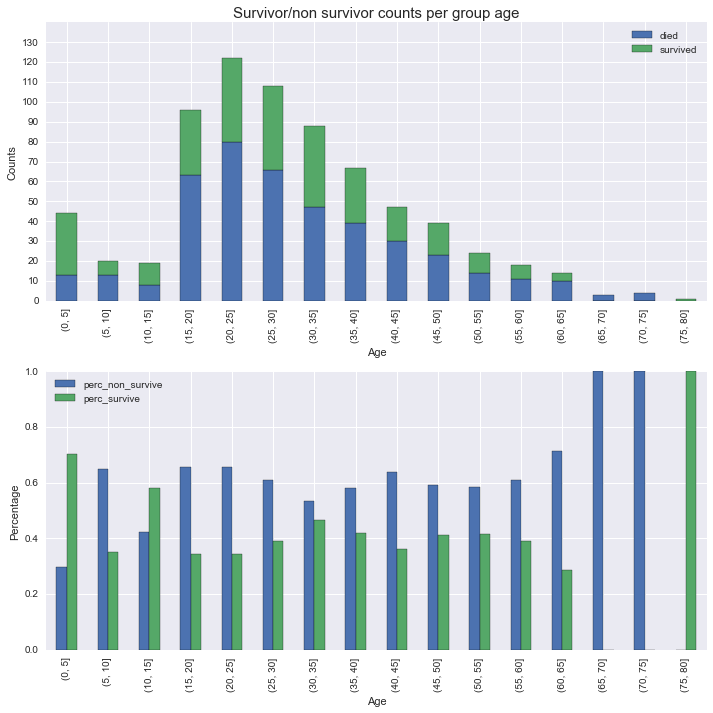

In [674]:
#Plotting results
fig, axes = plt.subplots(2, figsize=(10,10))
#Plotting for  counts
surv_non_surv_by_group_age[["non_survival", "total_surv"]].plot.bar(stacked=True, ax=axes[0], yticks=np.arange(0, 140, 10))
axes[0].set_title("Survivor/non survivor counts per group age", fontsize=15)
axes[0].set_ylabel("Counts")
stacks, labels_surv_counts = axes[0].get_legend_handles_labels()
my_labels = ["died", "survived"]
axes[0].legend(stacks ,my_labels)
#Plotting for percentages
surv_non_surv_by_group_age[["perc_non_survive", "perc_survive"]].plot.bar(ax=axes[1])
axes[1].set_ylabel("Percentage")
fig.tight_layout()

As it is possible to observe in the plots, the only two groups for which the percentage of survival is greater than of deaths, is for the ones within the 0-5 and 10-15 range. While we should also count the group of 75-80 years, note that this only corresponds to one observation (you can read more about his story [here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)). At odds with our assumption is that in the group for ages 5-10 there are more deaths that survivor. This is an interesting fact.

## Survival and Sex

In this section we will explore how survival was affected by sex condition. Furthermore, given that we have already analized the age variable, we can go even further and study how survival condition varied according to sex and age.

As before, we first will present descriptive statistics and then will provide plots to further study the patterns observed.

In [464]:
#Descriptive statistics
cross_surv_sex = pd.crosstab(titanic_sel_var["sex_cat"], titanic_sel_var["surv_cat"], margins=True)
print "Tabulation Sex and Survival Status (counts)"
cross_surv_sex

Tabulation Sex and Survival Status (counts)


surv_cat,Died,Survived,All
sex_cat,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [465]:
print "Tabulation Sex and Survival Status (percentage)"
cross_surv_sex.iloc[:-1, :-1].apply(lambda r: r/r.sum(), axis=0)

Tabulation Sex and Survival Status (percentage)


surv_cat,Died,Survived
sex_cat,,
female,0.148,0.681
male,0.852,0.319


As it is possible to observe in the previous tabulations, most of the survivors were women. Approximately 75% of women in the dataset survived. Of the men, roughly less than 19% survived. This goes in line with what we suspected: women were given priority for survival. 

In what follows we present the plots for these counts and percentages.

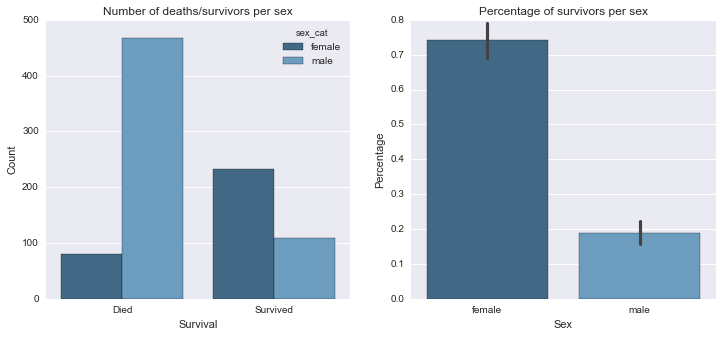

In [423]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(hue="sex_cat", x="surv_cat", data=titanic_sel_var, ax=ax[0], palette="Blues_d")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Survival")
ax[0].set_title("Number of deaths/survivors per sex")
sns.barplot(x="sex_cat", y="Survived", data=titanic_sel_var, order=["female", "male"], palette="Blues_d")
ax[1].set_ylabel("Percentage")
ax[1].set_title("Percentage of survivors per sex")
ax[1].set_xlabel("Sex")

Now we can check how sex and age plays a role in the chances of surviving the titanic. For that, we use once again the ages binned in 5 years span and see what happens when we disaggregate it by sex. We plot directly to see the relationships between these variables.

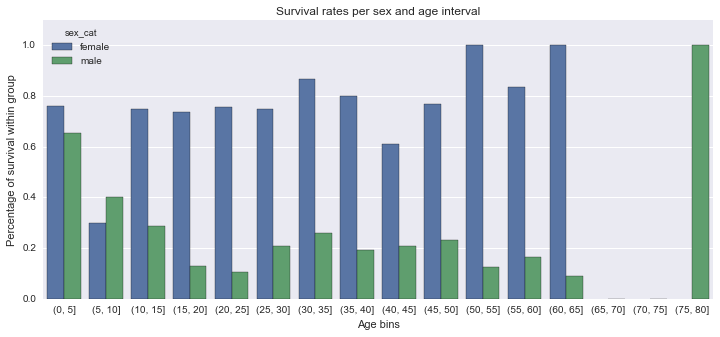

In [447]:
fig, ax = plt.subplots(1, figsize=(12,5))
sns.barplot(x=binned_aged, y="Survived", hue="sex_cat", data=titanic_no_na, ci=None, ax=ax)
ax.set_ylim([0,1.1])
ax.set_xlabel("Age bins")
ax.set_ylabel("Percentage of survival within group")
ax.set_title("Survival rates per sex and age interval")

The previous plot is very informative for checking the relationship between age and sex. As it is possible to see in the left of the plot, for children, the difference between male and female is not that important. For example, both survival rates are very high for male and female within the 0-5 and 5-10 year range. This tendency starts changing from 10 years onwards (again, 75-80 years is an exception). Here, the difference in survival rates are very high between male and female. Most of the time, the women's survival rate more than doubles that of the males.

## Survival and class

Money can also be an important factor for survival. The idea behind this, is that people that have more money can pay their way into survival. We have two variables that approximate this power: ticket class and money spent on ticket. As usual, we will first present some descriptive data. 

In [468]:
#Descriptive statistics
cross_surv_class = pd.crosstab(titanic_sel_var["surv_cat"], titanic_sel_var["Pclass"], margins=True)
print "Tabulation Class and Survival Status (counts)"
cross_surv_class

Tabulation Class and Survival Status (counts)


Pclass,1,2,3,All
surv_cat,,,,
Died,80,97,372,549
Survived,136,87,119,342
All,216,184,491,891


In [495]:
print "Tabulation Class and Survival Status (percentage)"
cross_surv_class.iloc[:-1, :-1].apply(lambda r: r/r.sum(), axis=1)

Tabulation Class and Survival Status (percentage)


Pclass,1,2,3
surv_cat,,,
Died,0.146,0.177,0.678
Survived,0.398,0.254,0.348


As it is possible to see in this cross tabulation, the class of the passenger seems to be highly related to their chances of surviving the accident. The most striking fact is that although first class only consitutes 24.24% of the total number of passengers, it takes up almost 40% of the total survivors. That is, if we take into account sheer numbers, this class appear to be overrepresented within the survivors. 

In the plots presented below, we present one with the counts of survivors per class and other with the percentage of survivors per class. A thing worth noticing is that in absolute numbers, even when first class is not the category with the most passengers, it takes the first place in the survivors. In other words, you can count more people in the first class between the survivors. 

This picture is clearer once we observed the percentage of survivors per class: note that the first class comes first: more than 60% of its members survived. Chances were not that good for people in the third class: slightly more than 20% of their class survived.

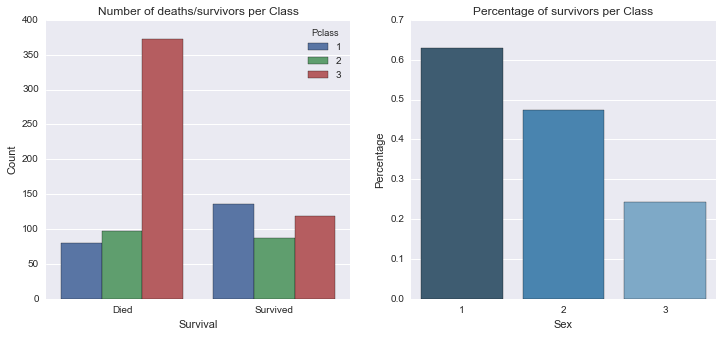

In [496]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(hue="Pclass", x="surv_cat", data=titanic_sel_var, ax=ax[0])
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Survival")
ax[0].set_title("Number of deaths/survivors per Class")
sns.barplot(x="Pclass", y="Survived", data=titanic_sel_var, palette="Blues_d", ci=None)
ax[1].set_ylabel("Percentage")
ax[1].set_title("Percentage of survivors per Class")
ax[1].set_xlabel("Sex")

Another way of determining how much the power of money is related to survival is by inspecting the fare variable. This variable records how much was paid for each ticket. First we start by getting the descriptive statistics for each of the groups.

In [503]:
print "Descriptive Statistics of Fares for non Survivors\n"
group_surv_fare = titanic_sel_var.groupby("Survived")['Fare']
print group_surv_fare.describe()[0]
print "\nDescriptive Statistics of Fares for Survivors\n"
print group_surv_fare.describe()[1]

Descriptive Statistics of Fares for non Survivors

count    549.000
mean      22.118
std       31.388
min        0.000
25%        7.854
50%       10.500
75%       26.000
max      263.000
Name: Fare, dtype: float64

Descriptive Statistics of Fares for Survivors

count    342.000
mean      48.395
std       66.597
min        0.000
25%       12.475
50%       26.000
75%       57.000
max      512.329
Name: Fare, dtype: float64


This statistics show an important difference in means of fares for survivors and non survivors of the titanic. Note that on average the group that did not survive paid 22.118 for its ticket. The group that survived paid 48.395. Once again we can perform a t-test to check if these difference are significant. 

$$\mu_{death} = \mu_{survived}$$
$$\mu_{death} \neq \mu_{survived}$$

Once again, the test is conducted for two independent random samples.

In [505]:
ttest_ind(group_surv_fare.get_group(0), group_surv_fare.get_group(1))

Ttest_indResult(statistic=-7.9391916608710549, pvalue=6.1201893419241981e-15)

From the results it is possible to observe that we can reject the null hypothesis that these two means come from the same population. We can further inspect this by looking at the plots below. Perhaps, the one that shows the biggest difference are the box plot on the right. There we can see how the distribution of fares for those who survived appears to be shifted to the right. Note also how the median, the horizontal line within the box, is much higher for the passengers that survived. We consider that thisrelated to the fact that people that spend more money had higher chances to survived the accident.

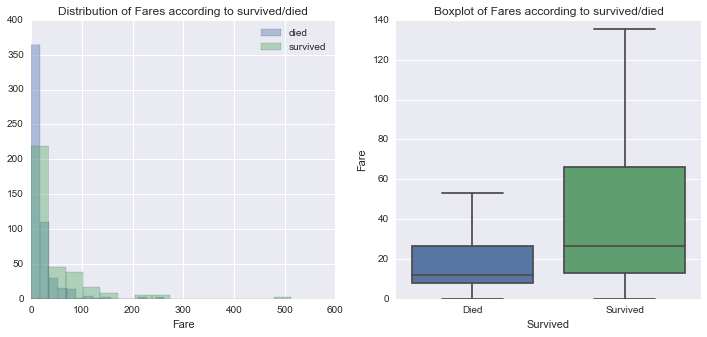

In [489]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
non_survived_fare_group = titanic_sel_var.groupby("Survived")['Fare'].get_group(0)
survived_fare_group = titanic_sel_var.groupby("Survived")['Fare'].get_group(1)
sns.distplot(non_survived_fare_group, ax=axes[0], label="died", bins=15, kde=False)
sns.distplot(survived_fare_group, ax=axes[0], label="survived", bins=15, kde=False)
axes[0].set_title("Distribution of Fares according to survived/died")
axes[0].legend()
sns.boxplot(x=titanic_no_na['Fare'], groupby=titanic_no_na["surv_cat"], ax=axes[1], showfliers=False)
axes[1].set_title("Boxplot of Fares according to survived/died")
axes[1].set_xlabel("Survived")

Even though, we have claimed that both money spent in tickets (fare) and class are both related to power people have to secure their survival, we have not provided evidence that these two variables `Class` and `Fare` are actually related. 

In [506]:
titanic_sel_var["Pclass"].corr(titanic_sel_var["Fare"])

-0.54949961994390784

Unsurprisingly, the result yields a strong negative correlation. In other words, the lower your class (think here not in the ordinal but in the cardinal scale), the higher you paid for your ticket.

As with ages, we can also try to further study the relationship between gender, class and survival status. We plot the results below.

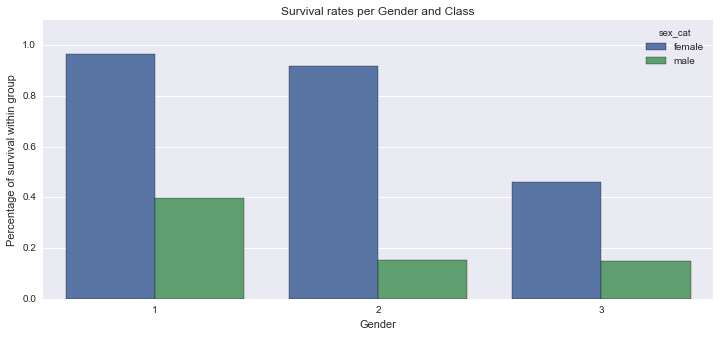

In [509]:
fig, ax = plt.subplots(1, figsize=(12,5))
sns.barplot(x="Pclass", y="Survived", hue="sex_cat", data=titanic_no_na, ci=None, ax=ax)
ax.set_ylim([0,1.1])
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of survival within group")
ax.set_title("Survival rates per Gender and Class")

As it is possible to observe in the plot above, class appears to have played a role. Note for example how almost all the women belonging to the first and second class survived the accident. The women in the third class were not that lucky: less than a half survived. On the other hand, belonging to the first class appears to also have been important for men: 40% survived, which is more than double the percentage when compared to their male peers of the other classes.

## Multivariate Analysis

While all the analysis so far has strive to take all of our selected variables into account, we could not do it in a way were all of them were considered at the same time. In this part of the analysis, we will try to check how all the variables, considered jointly, contributed to the possibilities of someone surving or dying in the Titanic. We also try to do ceteris paribus analysis. That is, we will try to study what is the relation of a variable with the probability of surviving, holding the other variable constant.

For this purpose we will use a logit model. We use a logit model because our outcome variable only takes two values. Additionally, a logit model let us calculate probabilities. Therefore, the results are easy to understand in common terms and also gives our predictions a level of uncertainty.

In [675]:
#Fitting the logit model
dep, ind_var = dmatrices('Survived ~ Pclass + Age + sex_cat', data=titanic_no_na, return_type='dataframe')
logit_mod = sm.Logit(dep, ind_var)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Sep 2016   Pseudo R-squ.:                  0.3289
Time:                        17:27:12   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.860e-68
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           5.0560      0.502     10.069      0.000         4.072     6.040
sex_cat[T.male

For fitting our model, we discarded the Fare variable given that it showed no significance. This might be related to the fact that, as seen before, this variable is stongly correlated with passangers' class. Once we fit the model we can see that all of the variables included are siginificance at the 0.001 level. 

A disadvantage of the logit model is that the coefficients cannot be directly interpreted. The only thing we can say is that sex, class and age all seem to have a negative effect on the chances of survival. (Note that sex is coded 1 for male and 0 for female).

Below we calculate point probabilities for interesting values of the variables.

In [618]:
#Function for calculating predicted probabilities at some values
def mult_function(intercept, sex, pclass, age):
    logit_params = logit_res.params
    reg_value = logit_params[0]*intercept + logit_params[1]*sex + logit_params[2]*pclass + logit_params[3]*age
    link_func = np.exp(reg_value) / (1 + np.exp(reg_value))
    return link_func

In [665]:
#Using different values for male / female / classes to obtain the predicted probabilities holding variable age at mean
mean_age = titanic_no_na["Age"].mean()
women_class_1 = mult_function(1, 0, 1, mean_age)
women_class_2 = mult_function(1, 0, 2, mean_age)
women_class_3 = mult_function(1, 0, 3, mean_age)
men_class_1 = mult_function(1, 1, 1, mean_age)
men_class_2 = mult_function(1, 1, 2, mean_age)
men_class_3 = mult_function(1, 1, 3, mean_age)


| |     1    |    2    |    3    |
|-----:|:-----:|:-----:|:-----:|
|**female** |    0.935  |   0.799    | 0.523    |
| **male** | 0.537 | 0.242 | 0.081 |

Here we have calculated predicted probabilities for interesting values of our variables. Note that all of the previous values have been calculated for a passanger age at its mean. 

The model yields some interesting results. For example, it is possible to see that the priority for survival was strongly related to first class females. Belonging to this class is related to a 93.5% chance of survival. If we compare with men from the same class, we can see that females are related to approximately 40% more chances of surviving the accident.

Once more, the story is completely different for passengers of the third class. When we compare women of the first and third class, we can see that belonging to the third class is related to more than 40% less chances of surviving. As expected, the ones that had it worst were the men of the third class. Belonging to this class is only related to approximately 8% chances of surviving.

In [646]:
#Studying effect of age. Creating age range
age_range = np.arange(0, 65, 0.5)

In [647]:
#Creating values that contain the probabilities for different ages at different values of class and sex
age_w_1 = mult_function(1, 0, 1, age_range)
age_w_2 = mult_function(1, 0, 2, age_range)
age_w_3 = mult_function(1, 0, 3, age_range)
age_m_1 = mult_function(1, 1, 1, age_range)
age_m_2 = mult_function(1, 1, 2, age_range)
age_m_3 = mult_function(1, 1, 3, age_range)

(0, 65)

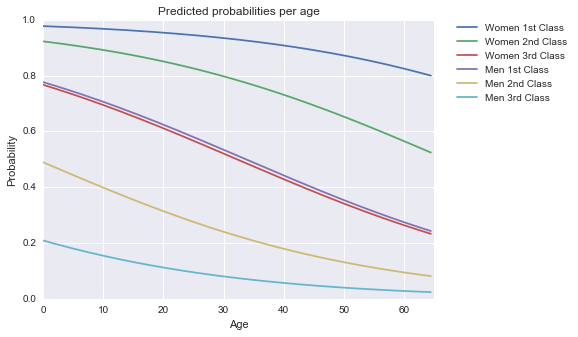

In [676]:
#Plotting the effects
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(age_range, age_w_1, label="Women 1st Class")
ax.plot(age_range, age_w_2, label="Women 2nd Class")
ax.plot(age_range, age_w_3, label="Women 3rd Class")
ax.plot(age_range, age_m_1, label="Men 1st Class")
ax.plot(age_range, age_m_2, label="Men 2nd Class")
ax.plot(age_range, age_m_3, label="Men 3rd Class")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Predicted probabilities per age")
ax.set_xlabel("Age")
ax.set_ylabel("Probability")
ax.set_xlim([0,65])

As we have many values for age, the results are easier to grasp when plotted. Here we vary the age for the different values that our independent variables take. It is interesting to see how, confirming what we expected, the probabilites of surviving are higher for smaller values of age. Still, what captures our attention is that for men in third class the probablity of surviving is barely bigger than 20% for children from 0-3 years. It is also interesting to see how for every level of age, the probability that a male that belongs to the first class will survive is bigger than that of a women that belongs to the third class. This again confirms that age did play a role when determining the survivals of the accident.

## Conclusions

In this report we have investigated the relationship between surviving in the Titanic. For that purpose, we used four independent variables: sex, passanger class, fare and age. All of this variables appear relevant and show strong relationships with the probability of surviving. This was observed in our descriptive statistics. Additionally, this result was also pervasive in our multivariate analysis. According to the logit model that we estimate age, sex and class are significantly related to the chances of surviving in the Titanic. Align with our expectations, the results show that from all the passengers, the women in the first category had a higher chance of surviving the accident. On the other hand, the men that belong to the third category had the smallest chances of surviving.
